## Créer notre RNN pour faire la catégorisation des genres

In [1]:
%cd /tf/notebooks/notebooks
%pip install pandas
%pip install scikit-learn
%pip install seaborn

/tf/notebooks/notebooks



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

df = pd.read_csv('clean_data/audio_features_3s.csv')

In [3]:
# Encode labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# Dictionnaire clef valeur du label_encoded:label
label_dict = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

In [4]:
label_dict

{0: 'blues',
 1: 'classical',
 2: 'country',
 3: 'disco',
 4: 'hiphop',
 5: 'jazz',
 6: 'metal',
 7: 'pop',
 8: 'reggae',
 9: 'rock'}

In [5]:
from sklearn.preprocessing import StandardScaler

Y = df['label_encoded']
X = df.drop(['label', 'label_encoded'], axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# transform Y to a ndarray
Y = Y.to_numpy()

In [6]:
type(X)

numpy.ndarray

In [7]:
type(Y)

numpy.ndarray

In [8]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [9]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

# extract X_val and Y_val from X_test and Y_test (0.5)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

In [10]:
X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape

((60, 16), (20, 16), (20, 16), (60,), (20,), (20,))

In [11]:
# Reshape for LSTM RNN
from keras.utils import to_categorical

number_labels = len(label_dict)

# X_train_traited = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
# X_test_traited = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
# X_val_traited = X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))

X_train_traited = X_train
X_test_traited = X_test
X_val_traited = X_val

Y_train_traited = to_categorical(Y_train, num_classes=number_labels)
Y_test_traited = to_categorical(Y_test, num_classes=number_labels)
Y_val_traited = to_categorical(Y_val, num_classes=number_labels)

2023-11-15 15:31:57.324153: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-15 15:31:57.324202: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-15 15:31:57.324217: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-15 15:31:57.328659: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
X_train_traited.shape, X_test_traited.shape, X_val_traited.shape, Y_train_traited.shape, Y_test_traited.shape, Y_val_traited.shape

((60, 16), (20, 16), (20, 16), (60, 10), (20, 10), (20, 10))

In [13]:
# Define RNN model
from tensorflow.keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1088      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 3498 (13.66 KB)
Trainable params: 3498 (13.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


2023-11-15 15:31:58.456448: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-15 15:31:58.462160: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-15 15:31:58.462215: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-15 15:31:58.463420: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-15 15:31:58.463479: I tensorflow/compile

In [20]:
import numpy as np

best_model_accuray = 0

for i in range(100):
    epochs = np.random.randint(25, 250)
    model.fit(X_train_traited, Y_train_traited, epochs=epochs, batch_size=16, validation_data=(X_val_traited, Y_val_traited), verbose=1)
    _, accuracy = model.evaluate(X_test_traited, Y_test_traited, verbose=1)
    if accuracy > best_model_accuray:
        best_model_accuray = accuracy
        model.save('models/best_model.h5')
    print(i + '/' + 100)

Epoch 1/214
4/4 [==============================] - 0s 23ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2682 - val_accuracy: 0.9500
Epoch 2/214
4/4 [==============================] - 0s 22ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2680 - val_accuracy: 0.9500
Epoch 3/214
4/4 [==============================] - 0s 28ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2677 - val_accuracy: 0.9500
Epoch 4/214
4/4 [==============================] - 0s 17ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2678 - val_accuracy: 0.9500
Epoch 5/214
4/4 [==============================] - 0s 15ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2676 - val_accuracy: 0.9500
Epoch 6/214
4/4 [==============================] - 0s 12ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2676 - val_accuracy: 0.9500
Epoch 7/214
4/4 [==============================] - 0s 23ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2673 - val_accuracy: 0.9500
Epoch 8/214
4/4 [===

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4/4 [==============================] - 0s 14ms/step - loss: 3.7755e-04 - accuracy: 1.0000 - val_loss: 0.2416 - val_accuracy: 0.9500
Epoch 3/249
4/4 [==============================] - 0s 15ms/step - loss: 3.7586e-04 - accuracy: 1.0000 - val_loss: 0.2417 - val_accuracy: 0.9500
Epoch 4/249
4/4 [==============================] - 0s 14ms/step - loss: 3.7392e-04 - accuracy: 1.0000 - val_loss: 0.2417 - val_accuracy: 0.9500
Epoch 5/249
4/4 [==============================] - 0s 17ms/step - loss: 3.7247e-04 - accuracy: 1.0000 - val_loss: 0.2415 - val_accuracy: 0.9500
Epoch 6/249
4/4 [==============================] - 0s 13ms/step - loss: 3.7053e-04 - accuracy: 1.0000 - val_loss: 0.2414 - val_accuracy: 0.9500
Epoch 7/249
4/4 [==============================] - 0s 18ms/step - loss: 3.6885e-04 - accuracy: 1.0000 - val_loss: 0.2412 - val_accuracy: 0.9500
Epoch 8/249
4/4 [==============================] - 0s 16ms/step - loss: 3.6698e-04 - accuracy: 1.0000 - val_loss: 0.2413 - val_accuracy: 0.9500
Epoc

KeyboardInterrupt: 

In [22]:
print ("Best model accuracy: ", best_model_accuray)

Best model accuracy:  0.8999999761581421


## Enregistrement du modèle

In [15]:
# save model
model.save('./models/music_genre_model.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Évaluation du modèle

In [16]:
loss, accuracy = model.evaluate(X_test_traited, Y_test_traited, verbose=1)
print(f'Accuracy model: {accuracy*100}%')

1/1 [==============================] - 0s 18ms/step - loss: 1.0579 - accuracy: 0.7500
Accuracy model: 75.0%


1/1 [==============================] - 0s 17ms/step


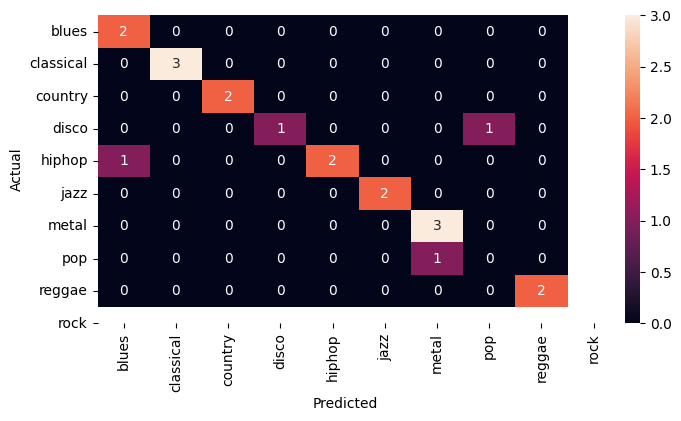

In [23]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Y_pred = model.predict(X_test_traited)
Y_pred = np.argmax(Y_pred, axis=1)
Y_test_max = np.argmax(Y_test_traited, axis=1)

class_names = [label_dict[i] for i in range(len(label_dict))]
conf_mat = confusion_matrix(Y_test_max, Y_pred)

fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, ax=ax)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# load model$
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model

model = load_model('./models/music_genre_model.h5')

# data 
feature = [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,]
label_dict = {
    0: 'blues',
    1: 'classical',
    2: 'country',
    3: 'disco',
    4: 'hiphop',
    5: 'jazz',
    6: 'metal',
    7: 'pop',
    8: 'reggae',
    9: 'rock'
}

# predict
model.predict(feature)

# print predicted label
print(label_dict[np.argmax(model.predict(feature))])
